In [48]:
import sys
import numpy as np #Linear Algebra
import pandas as pd #Data Processing
import seaborn as sns #Data Visualizaton.
import pickle
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder #LabelEncoding From Sklearm
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding From Sklearn 
from sklearn.model_selection import train_test_split #split Data in Train & Test Array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier#ml Algorithm 
from sklearn.metrics import accuracy_score #Calculate Accuracy Score
import sklearn.metrics as metrics #Confusion Matrix

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
dataset= pd.read_csv("/content/drive/MyDrive/DATASET/flightdata (1).csv")

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [52]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [53]:
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [54]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

Text(0.5, 1.0, 'scatter plot between ARR_DELAY and ARR_DEL15')

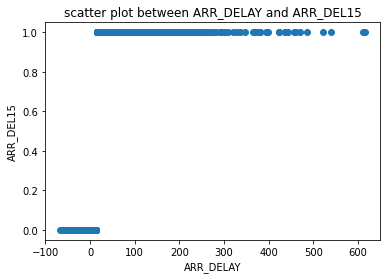

In [55]:
plt.scatter(dataset['ARR_DELAY'],dataset['ARR_DEL15'])
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.title('scatter plot between ARR_DELAY and ARR_DEL15')

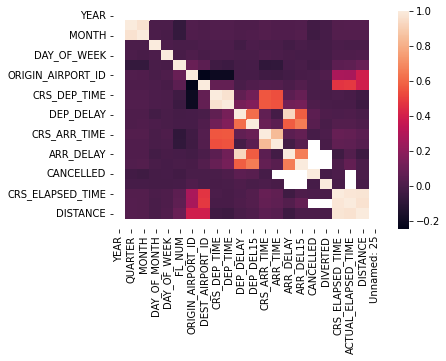

In [56]:
#sns.catplot(x='ARR_DEL15',y='ARR_DELAY',data= flightdata)
sns.heatmap(dataset.corr())

In [57]:
dataset = dataset.drop('Unnamed: 25',axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [58]:
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [59]:
dataset = dataset.fillna ({'ARR_DEL15': 1})
dataset = dataset.fillna ({'DEP_DEL15': 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [60]:
import math
for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset [ 'DEST'])
dataset['ORIGIN'] =le.fit_transform(dataset ['ORIGIN'])

In [62]:
dataset.head (5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


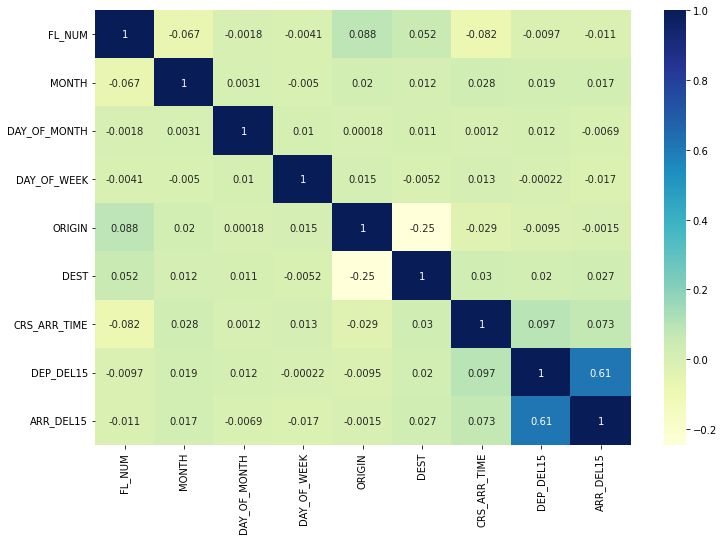

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),cmap="YlGnBu",annot=True)

In [64]:
x=dataset.iloc[:, 4:5].values
y=dataset.iloc[:, 5:6].values
x.shape

(11231, 1)

In [65]:
y

array([[4],
       [3],
       [4],
       ...,
       [4],
       [4],
       [1]])

In [66]:
dataset =pd.get_dummies (dataset, columns=['ORIGIN', 'DEST']) 
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [67]:
x=dataset.iloc[:, 0:8].values
y=dataset.iloc[:, 8:9].values

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [69]:
x_test.shape

(2247, 8)

In [70]:
x_train.shape

(8984, 8)

In [71]:
y_train.shape

(8984, 1)

In [72]:
y_train.shape

(8984, 1)

In [73]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [74]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import imblearn

In [76]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [77]:
x_train_smote,y_train_smote =smote.fit_resample(x_train,y_train)

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(random_state=0)
classifier.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=0)

In [79]:
decisiontree = classifier.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,decisiontree)
acc

0.9728526924788607

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,decisiontree)

In [82]:
cm

array([[1763,   39],
       [  22,  423]])

**RANDOMFORESTCLASSIFIER**

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train_smote,y_train_smote)
rf.score(x_test,y_test)

0.9203382287494437

**LOGISTIC REGRESSION**

In [84]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train_smote,y_train_smote)
lr1.score(x_test,y_test)

0.47930574098798395

**SVM**

In [85]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train_smote,y_train_smote)
svm.score(x_test,y_test)

0.5825545171339563

**KNearestNeighbours**

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_smote,y_train_smote)
knn.score(x_test,y_test)

0.7013796172674678

**Evaluation of Random Forest**

Testing Sensitivity for Random Forest 0.934654525977504
Testing Specificity for Random Forest 0.85
Testing Precision for Random Forest 0.9683684794672586
Testing accuracy for Random Forest 0.9203382287494437


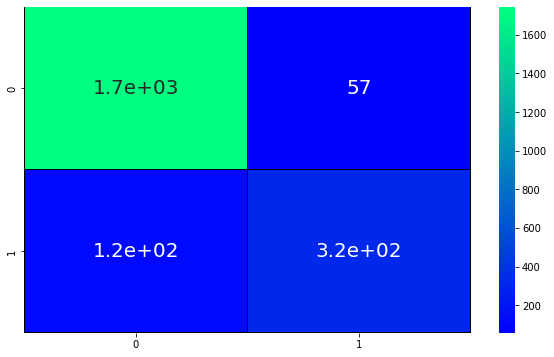

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [88]:
print(classification_report(y_test,pred))#RandomForest

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1802
           1       0.85      0.73      0.78       445

    accuracy                           0.92      2247
   macro avg       0.89      0.85      0.87      2247
weighted avg       0.92      0.92      0.92      2247



**Evaluation Of Decission Tree**

Testing Accuracy for Decision Tree 0.9728526924788607
Testing Sensitivity for Decision Tree 0.9876750700280112
Testing Specificity for Decision Tree 0.9155844155844156
Testing Precision for Decision Tree 0.9783573806881243
Testing accuracy for Decision Tree 0.9728526924788607


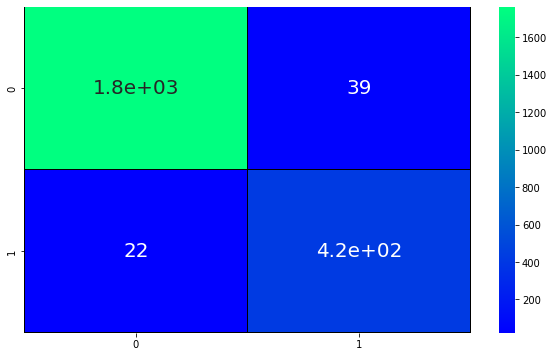

In [89]:
pred1=classifier.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [90]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1802
           1       0.92      0.95      0.93       445

    accuracy                           0.97      2247
   macro avg       0.95      0.96      0.96      2247
weighted avg       0.97      0.97      0.97      2247



In [91]:
import pickle
pickle.dump(classifier,open('flight.pkl','wb'))